In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xlrd

In [34]:
# import data
perfil = pd.read_excel('Base MUNIC 2017_perfil_gestao_servicos.xls', 
                       sheet_name="Informações atual prefeito", 
                       na_values="Não informou")

In [35]:
perfil.head()

,CodMun,MPEG02,MPEG03,MPEG04,MPEG05,MPEG06
0,1100015,Não,Masculino,32.0,Ensino médio (2º Grau) completo,PP
1,1100023,Não,Masculino,37.0,Pós-graduação,PMDB
2,1100031,Sim,Masculino,56.0,Ensino fundamental (1º Grau) completo,PMDB
3,1100049,Não,Feminino,49.0,Ensino superior completo,PMDB
4,1100056,Sim,Masculino,58.0,Pós-graduação,PP


In [36]:
perfil.shape

(5570, 6)

In [39]:
perfil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 6 columns):
CodMun    5570 non-null int64
MPEG02    5570 non-null object
MPEG03    5570 non-null object
MPEG04    5551 non-null float64
MPEG05    5570 non-null object
MPEG06    5570 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 261.2+ KB


In [43]:
round(perfil.MPEG03.value_counts(normalize=True)*100)

Masculino    88.0
Feminino     12.0
Name: MPEG03, dtype: float64

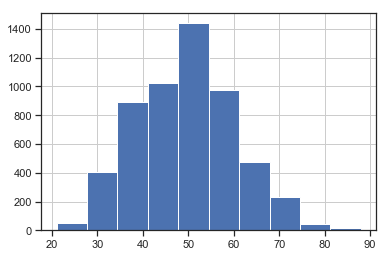

In [45]:
perfil.MPEG04.hist()

In [46]:
perfil.MPEG04.describe()

count    5551.000000
mean       49.511800
std        10.730381
min        21.000000
25%        42.000000
50%        50.000000
75%        57.000000
max        88.000000
Name: MPEG04, dtype: float64

In [47]:
perfil.MPEG05.value_counts()

Ensino superior completo                   2328
Ensino médio (2º Grau) completo            1437
Pós-graduação                               701
Ensino superior incompleto                  444
Ensino fundamental (1º Grau) incompleto     256
Ensino fundamental (1º Grau) completo       241
Ensino médio (2º Grau) incompleto           163
Name: MPEG05, dtype: int64

In [53]:
round(perfil.groupby('MPEG03')['MPEG05'].value_counts(normalize=True)*100)

MPEG03     MPEG05                                 
Feminino   Ensino superior completo                   53.0
           Pós-graduação                              19.0
           Ensino médio (2º Grau) completo            16.0
           Ensino superior incompleto                  8.0
           Ensino médio (2º Grau) incompleto           2.0
           Ensino fundamental (1º Grau) incompleto     1.0
           Ensino fundamental (1º Grau) completo       1.0
Masculino  Ensino superior completo                   40.0
           Ensino médio (2º Grau) completo            27.0
           Pós-graduação                              12.0
           Ensino superior incompleto                  8.0
           Ensino fundamental (1º Grau) incompleto     5.0
           Ensino fundamental (1º Grau) completo       5.0
           Ensino médio (2º Grau) incompleto           3.0
Name: MPEG05, dtype: float64

In [55]:
perfil.groupby('MPEG03')['MPEG04'].describe().T

MPEG03,Feminino,Masculino
count,658.000000,4893.000000
mean,48.288754,49.676272
std,10.371570,10.768158
min,24.000000,21.000000
25%,41.000000,42.000000
50%,48.000000,50.000000
75%,56.000000,57.000000
max,83.000000,88.000000


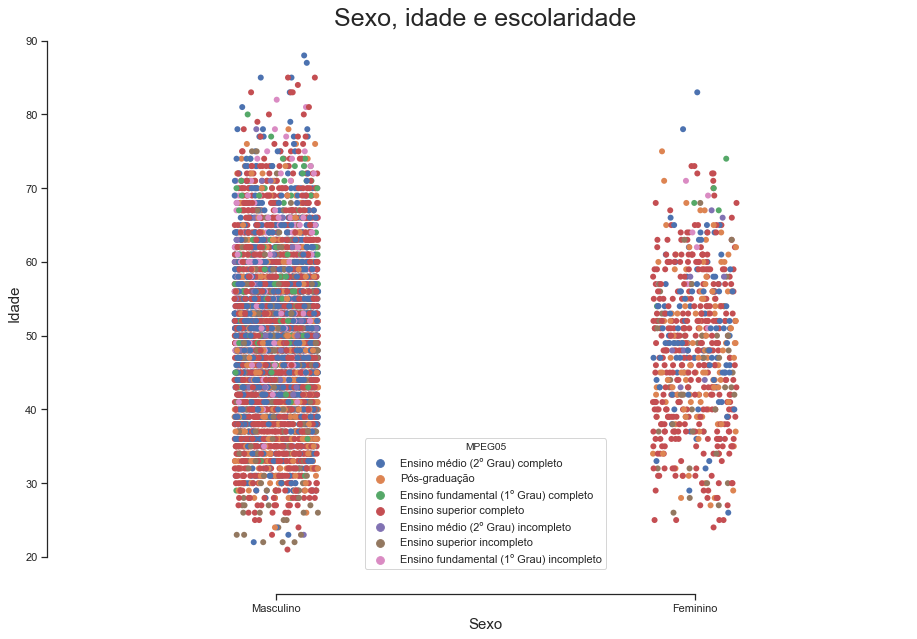

In [13]:
# relação entre sexo, idade e escolaridade
sns.set(style="ticks")

_ = plt.figure(figsize=(15,10))
_ = sns.stripplot(x=perfil.MPEG03,
                  y=perfil.MPEG04, 
                  hue=perfil.MPEG05,
                  data=perfil,
                  size=6,
                 )
_ = plt.xlabel("Sexo", fontsize=15)
_ = plt.ylabel("Idade", fontsize=15)
_ = plt.title("Sexo, idade e escolaridade", fontsize=25)
sns.despine(offset=20, trim=True)

In [56]:
# recode a variable MPEG05
rename_MPEG05 = {"Pós-graduação": "Ensino superior completo", 
               "Ensino superior completo ": "Ensino superior completo",
               "Ensino superior incompleto ": "Ensino superior incompleto",
               "Ensino fundamental (1º Grau) incompleto": "Ensino médio incompleto ou abaixo", 
               "Ensino fundamental (1º Grau) completo": "Ensino médio incompleto ou abaixo",
               "Ensino médio (2º Grau) incompleto": "Ensino médio incompleto ou abaixo",
               "Ensino médio (2º Grau) completo": "Ensino médio completo"}

In [57]:
perfil['MPEG05_code'] = perfil['MPEG05'].map(rename_MPEG05)

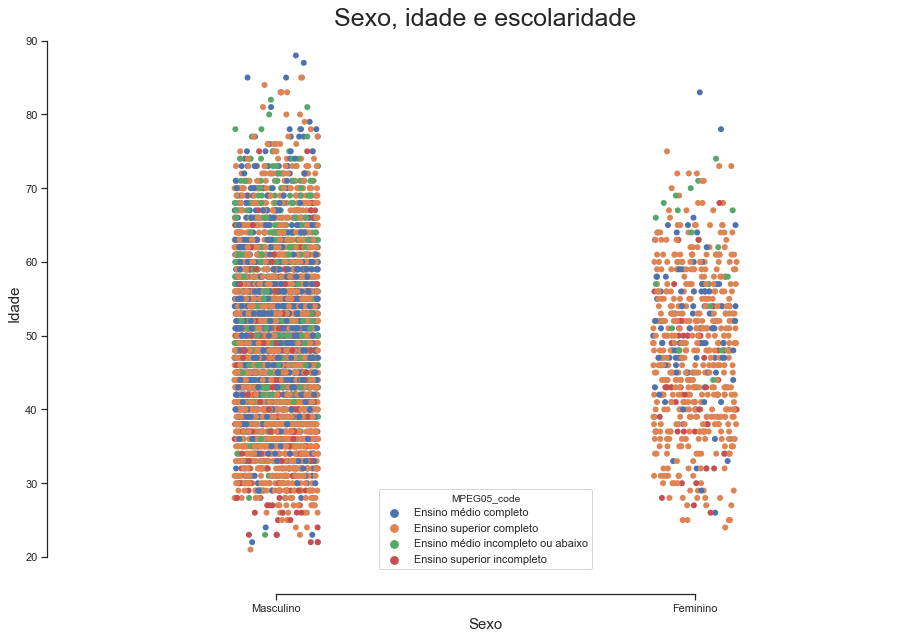

In [59]:
# relação entre sexo, idade e escolaridade
sns.set(style="ticks")

_ = plt.figure(figsize=(15,10))
_ = sns.stripplot(x=perfil.MPEG03,
                  y=perfil.MPEG04, 
                  hue=perfil.MPEG05_code,
                  data=perfil,
                  size=6,
                 )
_ = plt.xlabel("Sexo", fontsize=15)
_ = plt.ylabel("Idade", fontsize=15)
_ = plt.title("Sexo, idade e escolaridade", fontsize=25)
sns.despine(offset=20, trim=True)

In [60]:
# recode a variable MPEG05
rename_MPEG05 = {"Pós-graduação": "Ensino superior completo ou incompleto", 
               "Ensino superior completo ": "Ensino superior completo ou incompleto",
               "Ensino superior incompleto ": "Ensino superior completo ou incompleto",
               "Ensino fundamental (1º Grau) incompleto": "Ensino médio ou abaixo", 
               "Ensino fundamental (1º Grau) completo": "Ensino médio ou abaixo",
               "Ensino médio (2º Grau) incompleto": "Ensino médio ou abaixo",
               "Ensino médio (2º Grau) completo": "Ensino médio ou abaixo"}

In [61]:
perfil['MPEG05_code'] = perfil['MPEG05'].map(rename_MPEG05)

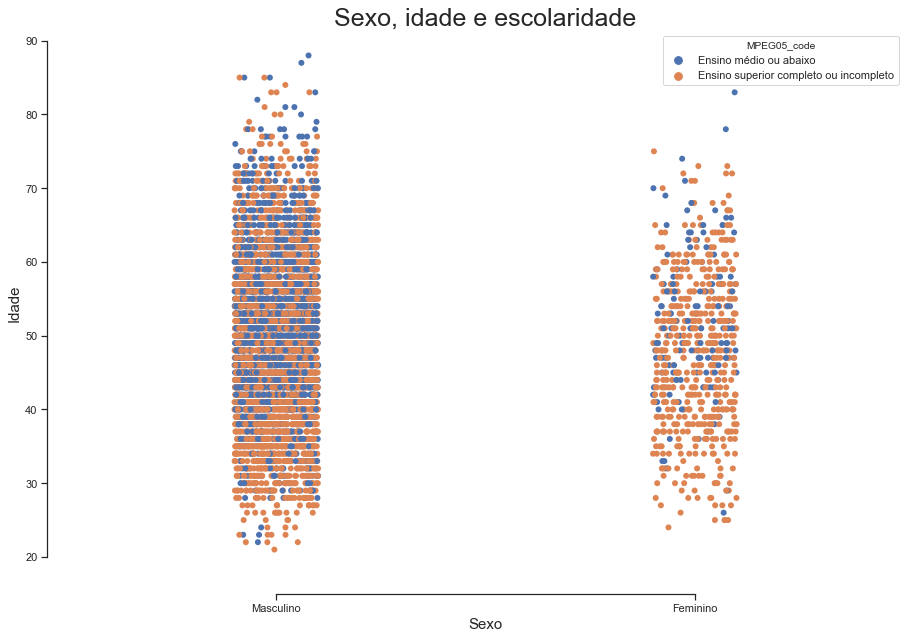

In [62]:
# relação entre sexo, idade e escolaridade
sns.set(style="ticks")

_ = plt.figure(figsize=(15,10))
_ = sns.stripplot(x=perfil.MPEG03,
                  y=perfil.MPEG04, 
                  hue=perfil.MPEG05_code,
                  data=perfil,
                  size=6,
                 )
_ = plt.xlabel("Sexo", fontsize=15)
_ = plt.ylabel("Idade", fontsize=15)
_ = plt.title("Sexo, idade e escolaridade", fontsize=25)
sns.despine(offset=20, trim=True)

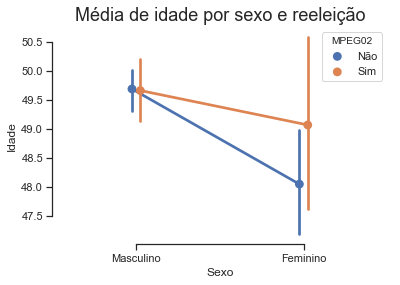

In [63]:
"""
A entrada de mulheres mais jovens nas prefeituras

Observa-se que as mulheres reeleitas são mais velhas do que as 
candidatas que não ocupavam o cargo de prefeitas na última eleição.
Em relação aos homens, a média de idade entre os eleitos e 
os reeleitos é a mesma.
"""
ax = sns.pointplot(perfil.MPEG03, 
                   perfil.MPEG04, 
                   hue=perfil.MPEG02, 
                  dodge=True)
ax = sns.despine(trim=True)
ax = plt.xlabel("Sexo")
ax = plt.ylabel("Idade")
#ax = plt.legend(['Não releito'], ['Reeleito'])
ax = plt.title("Média de idade por sexo e reeleição",fontsize="18")